In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
from pylab import rcParams
rcParams['figure.figsize']=15,8

In [3]:
df= pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(df.shape)

(303, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [7]:
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 14)


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
z = np.abs(stats.zscore(df))
data = df[(z<3).all(axis=1)]
data.shape

(287, 14)

<AxesSubplot:>

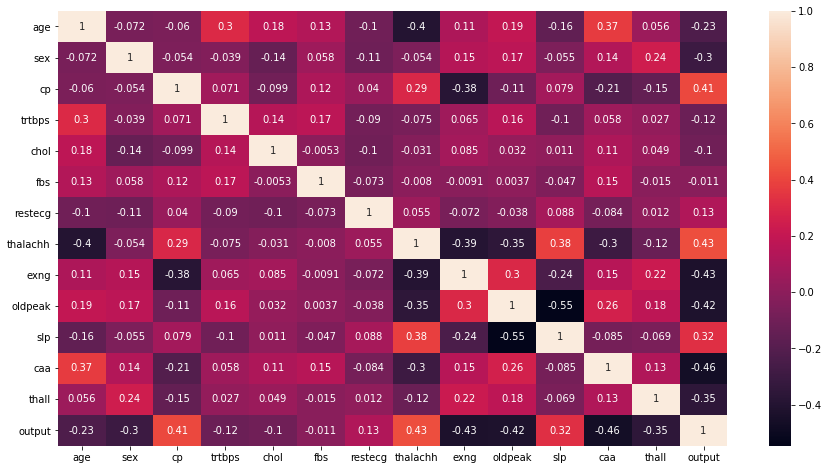

In [10]:
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:xlabel='sex', ylabel='age'>

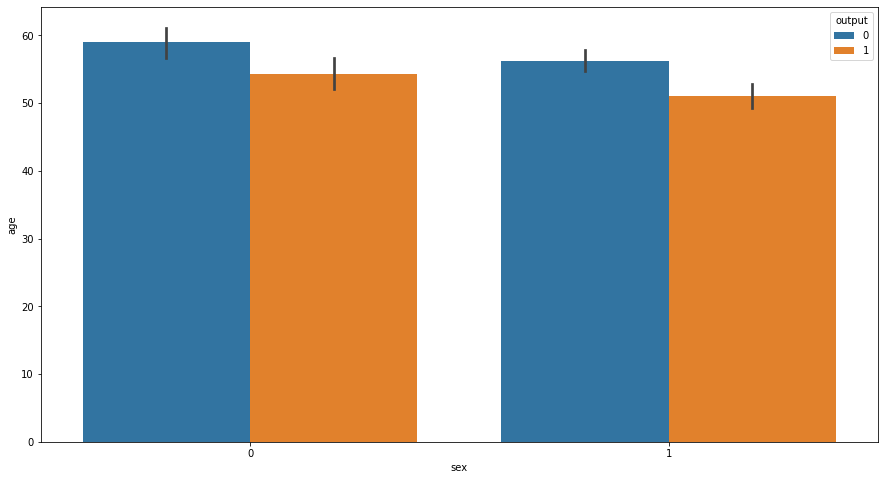

In [11]:
sns.barplot(x = data['sex'], y = data['age'], hue = data['output'])

<AxesSubplot:xlabel='age', ylabel='Count'>

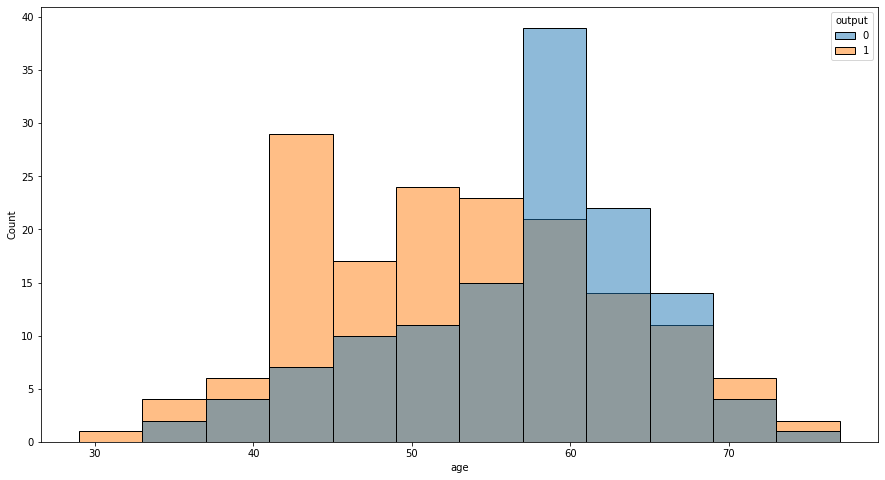

In [12]:
sns.histplot(data,x='age',hue='output',stat='count')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


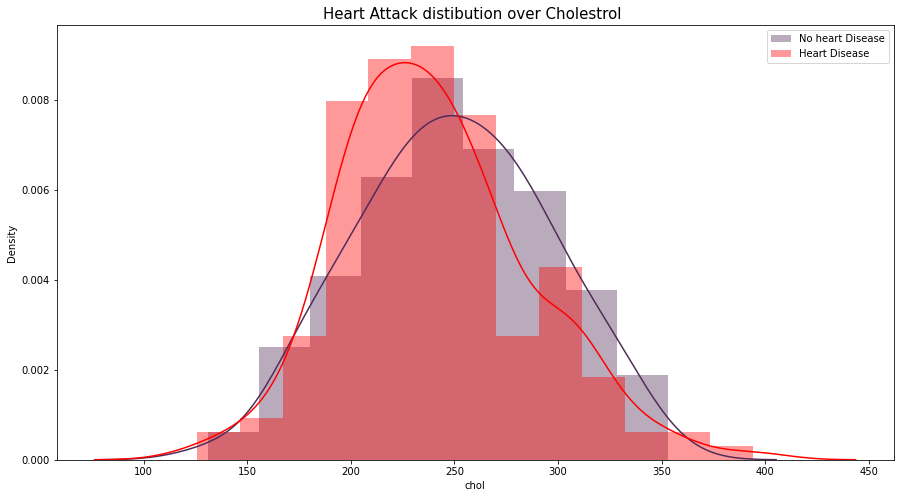

In [13]:
sns.distplot(data[data['output'] == 0]["chol"], color='#512b58',label='No heart Disease') 
sns.distplot(data[data['output'] == 1]["chol"], color='#FF0000',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Cholestrol ', fontsize=15)
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


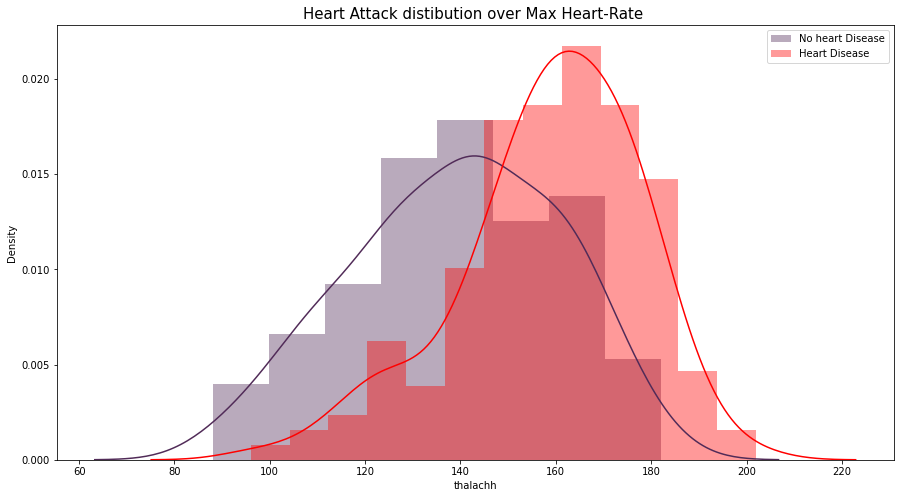

In [14]:
sns.distplot(data[data['output'] == 0]["thalachh"], color='#512b58',label='No heart Disease') 
sns.distplot(data[data['output'] == 1]["thalachh"], color='#FF0000',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Max Heart-Rate ', fontsize=15)
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
y = data['output']
X = data.drop(columns = ['output'],axis = 1)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
from sklearn import preprocessing
import pandas as pd
d = preprocessing.normalize(X,axis = 0)
names = X.columns
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.shape

(287, 13)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.20, random_state=0)

Accuracy of logistic regression classifier: 74.14%


<AxesSubplot:title={'center':'Confusion metric'}>

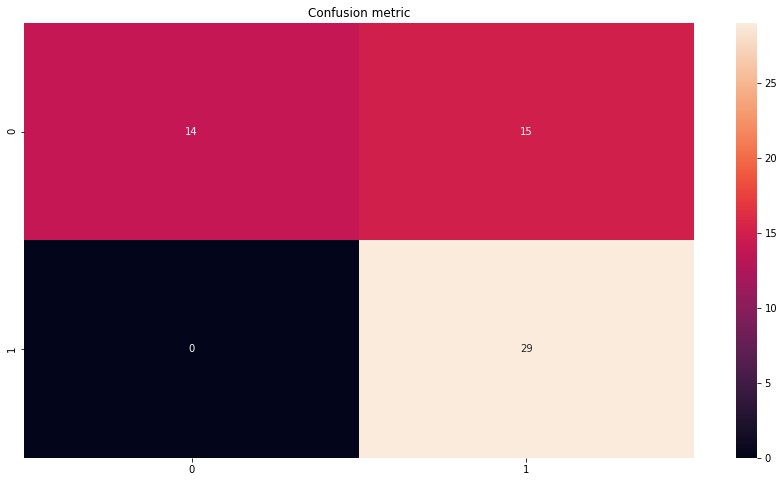

In [19]:

logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)

#Check prediction of Logistic Regression
y_pred_logReg = logReg.predict(X_test)

#Model Accuracy
print("Accuracy of logistic regression classifier: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_logReg)*100.0))

#Confusion matrix
plt.title("Confusion metric")
sns.heatmap(confusion_matrix(y_test, y_pred_logReg), annot = True)

In [20]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred_SVM = clf.predict(X_test)
print("Accuracy of SVM: %.2f%%" % (metrics.accuracy_score(y_test,y_pred_SVM)*100.0))

Accuracy of SVM: 89.66%
